## 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Real Estate Price Prediction'

In [4]:
#Import RDC_inventory_by_month_updated_1.pkl
df_inventory_by_month_updated=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'RDC_inventory_by_month_updated_1.pkl'))

In [5]:
df_inventory_by_month_updated.shape

(2547959, 15)

In [6]:
df_inventory_by_month_updated.columns

Index(['month_date_yyyymm', 'ZCTA5CE20', 'city_state', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count',
       'days_on_market_category'],
      dtype='object')

In [7]:
df_inventory_by_month_updated.head()

month_date_yyyymm ZCTA5CE20      city_state  median_listing_price  \
0            202401     59259      richey, mt               74000.0   
1            202401     97369  otter rock, or               28250.0   
2            202401      4922     burnham, me              187000.0   
3            202401     49705       afton, mi               84875.0   
5            202401     71841     gillham, ar              293750.0   

   active_listing_count  median_days_on_market  new_listing_count  \
0                   2.0                   59.0                0.0   
1                   8.0                   53.0                2.0   
2                   4.0                   81.0                0.0   
3                   1.0                   76.0                0.0   
5                   2.0                   25.0                2.0   

   price_increased_count  price_reduced_count  pending_listing_count  \
0                    0.0                  0.0               19.93114   
1                    0.0                  0.0               19.93114   
2                    0.0                  0.0                3.00000   
3                    0.0                  2.0                1.00000   
5                    0.0                  0.0               19.93114   

   median_listing_price_per_square_foot  median_square_feet  \
0                                  96.0               824.0   
1                                  29.0               947.0   
2                                 178.0               907.0   
3                                  91.0               903.0   
5                                 205.0              1532.0   

   average_listing_price  total_listing_count days_on_market_category  
0                74000.0                  2.0     high_days_on_market  
1               130056.0                  8.0     high_days_on_market  
2               207661.0                  7.0     high_days_on_market  
3                84875.0                  1.0     high_days_on_market  
5               306250.0                  2.0   medium_days_on_market

In [8]:
df_inventory_by_month_updated.rename(columns = {'ZCTA5CE20' : 'zipcode'}, inplace = True)

In [9]:
df_inventory_by_month_updated.head()

month_date_yyyymm zipcode      city_state  median_listing_price  \
0            202401   59259      richey, mt               74000.0   
1            202401   97369  otter rock, or               28250.0   
2            202401    4922     burnham, me              187000.0   
3            202401   49705       afton, mi               84875.0   
5            202401   71841     gillham, ar              293750.0   

   active_listing_count  median_days_on_market  new_listing_count  \
0                   2.0                   59.0                0.0   
1                   8.0                   53.0                2.0   
2                   4.0                   81.0                0.0   
3                   1.0                   76.0                0.0   
5                   2.0                   25.0                2.0   

   price_increased_count  price_reduced_count  pending_listing_count  \
0                    0.0                  0.0               19.93114   
1                    0.0                  0.0               19.93114   
2                    0.0                  0.0                3.00000   
3                    0.0                  2.0                1.00000   
5                    0.0                  0.0               19.93114   

   median_listing_price_per_square_foot  median_square_feet  \
0                                  96.0               824.0   
1                                  29.0               947.0   
2                                 178.0               907.0   
3                                  91.0               903.0   
5                                 205.0              1532.0   

   average_listing_price  total_listing_count days_on_market_category  
0                74000.0                  2.0     high_days_on_market  
1               130056.0                  8.0     high_days_on_market  
2               207661.0                  7.0     high_days_on_market  
3                84875.0                  1.0     high_days_on_market  
5               306250.0                  2.0   medium_days_on_market

In [10]:
df_inventory_by_month_updated.dtypes

month_date_yyyymm                        object
zipcode                                  object
city_state                               object
median_listing_price                    float64
active_listing_count                    float64
median_days_on_market                   float64
new_listing_count                       float64
price_increased_count                   float64
price_reduced_count                     float64
pending_listing_count                   float64
median_listing_price_per_square_foot    float64
median_square_feet                      float64
average_listing_price                   float64
total_listing_count                     float64
days_on_market_category                  object
dtype: object

In [11]:
### Permanantly dropping categorical columns from the dataframe to run k-means
kmeans_df= df_inventory_by_month_updated.drop(columns = [ 'month_date_yyyymm', 'zipcode', 'city_state', 'days_on_market_category'])

In [12]:
kmeans_df.head()

median_listing_price  active_listing_count  median_days_on_market  \
0               74000.0                   2.0                   59.0   
1               28250.0                   8.0                   53.0   
2              187000.0                   4.0                   81.0   
3               84875.0                   1.0                   76.0   
5              293750.0                   2.0                   25.0   

   new_listing_count  price_increased_count  price_reduced_count  \
0                0.0                    0.0                  0.0   
1                2.0                    0.0                  0.0   
2                0.0                    0.0                  0.0   
3                0.0                    0.0                  2.0   
5                2.0                    0.0                  0.0   

   pending_listing_count  median_listing_price_per_square_foot  \
0               19.93114                                  96.0   
1               19.93114                                  29.0   
2                3.00000                                 178.0   
3                1.00000                                  91.0   
5               19.93114                                 205.0   

   median_square_feet  average_listing_price  total_listing_count  
0               824.0                74000.0                  2.0  
1               947.0               130056.0                  8.0  
2               907.0               207661.0                  7.0  
3               903.0                84875.0                  1.0  
5              1532.0               306250.0                  2.0

In [13]:
kmeans_df.shape

(2547959, 11)

In [14]:
kmeans_df.describe()

median_listing_price  active_listing_count  median_days_on_market  \
count          2.547959e+06          2.547959e+06           2.547959e+06   
mean           3.227251e+05          3.191843e+01           7.450151e+01   
std            2.736396e+05          5.799204e+01           5.267785e+01   
min            1.000000e+03          0.000000e+00           1.000000e+00   
25%            1.481750e+05          3.000000e+00           3.900000e+01   
50%            2.499000e+05          1.100000e+01           6.200000e+01   
75%            3.999000e+05          3.700000e+01           9.500000e+01   
max            2.199999e+06          2.646000e+03           3.650000e+02   

       new_listing_count  price_increased_count  price_reduced_count  \
count       2.547959e+06           2.547959e+06         2.547959e+06   
mean        1.425676e+01           8.732446e-01         8.535822e+00   
std         2.383771e+01           3.971985e+00         1.868168e+01   
min         0.000000e+00           0.000000e+00         0.000000e+00   
25%         0.000000e+00           0.000000e+00         0.000000e+00   
50%         4.000000e+00           0.000000e+00         2.000000e+00   
75%         1.800000e+01           0.000000e+00         8.000000e+00   
max         8.020000e+02           2.680000e+02         6.280000e+02   

       pending_listing_count  median_listing_price_per_square_foot  \
count           2.547959e+06                          2.547959e+06   
mean            1.993556e+01                          1.678565e+02   
std             2.963526e+01                          1.669924e+02   
min             0.000000e+00                          1.000000e+00   
25%             2.000000e+00                          8.900000e+01   
50%             1.300000e+01                          1.340000e+02   
75%             1.993114e+01                          1.980000e+02   
max             9.760000e+02                          2.999100e+04   

       median_square_feet  average_listing_price  total_listing_count  
count        2.547959e+06           2.547959e+06         2.547959e+06  
mean         1.935481e+03           3.877649e+05         4.720489e+01  
std          6.995073e+02           3.566888e+05         7.980762e+01  
min          1.000000e+00           1.000000e+03         0.000000e+00  
25%          1.499000e+03           1.699000e+05         4.000000e+00  
50%          1.817000e+03           2.872560e+05         1.600000e+01  
75%          2.216000e+03           4.721950e+05         5.800000e+01  
max          9.999000e+03           3.199993e+06         2.860000e+03

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
import statistics

In [17]:
kmeans_df.var()

median_listing_price                    7.487860e+10
active_listing_count                    3.363076e+03
median_days_on_market                   2.774956e+03
new_listing_count                       5.682363e+02
price_increased_count                   1.577666e+01
price_reduced_count                     3.490051e+02
pending_listing_count                   8.782488e+02
median_listing_price_per_square_foot    2.788646e+04
median_square_feet                      4.893104e+05
average_listing_price                   1.272269e+11
total_listing_count                     6.369256e+03
dtype: float64

In [18]:
x = kmeans_df

D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

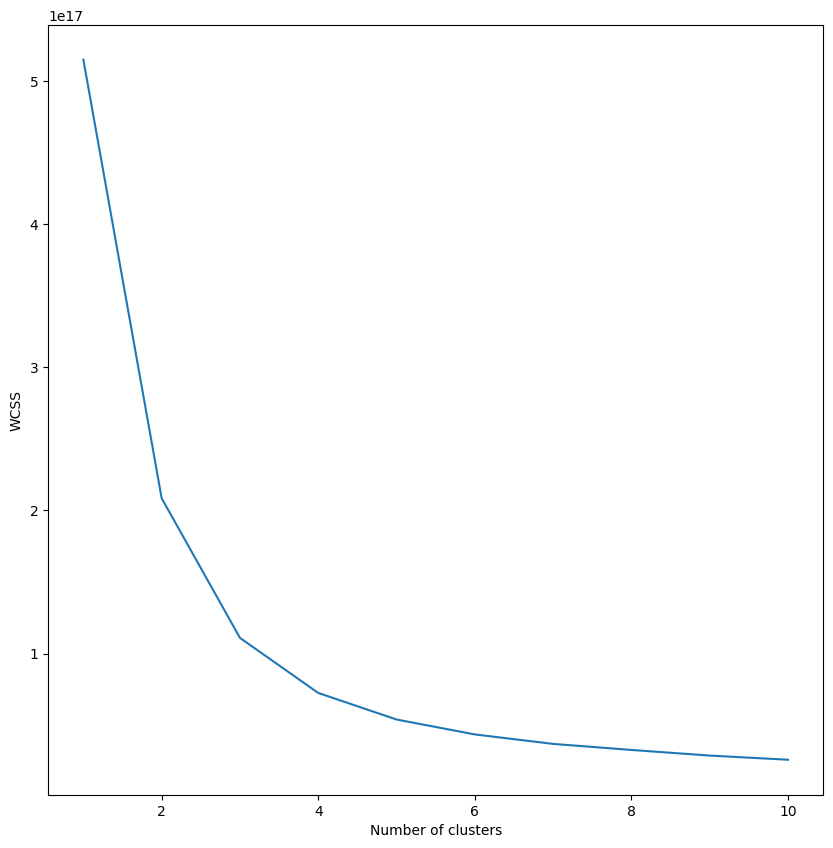

In [19]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = 'k-means++')
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### I will use 6 clusters as that is where the line becomes flatter. 

## Applying PCA in 2 dimensions


In [20]:
pca = PCA(2)
data = pca.fit_transform(x)

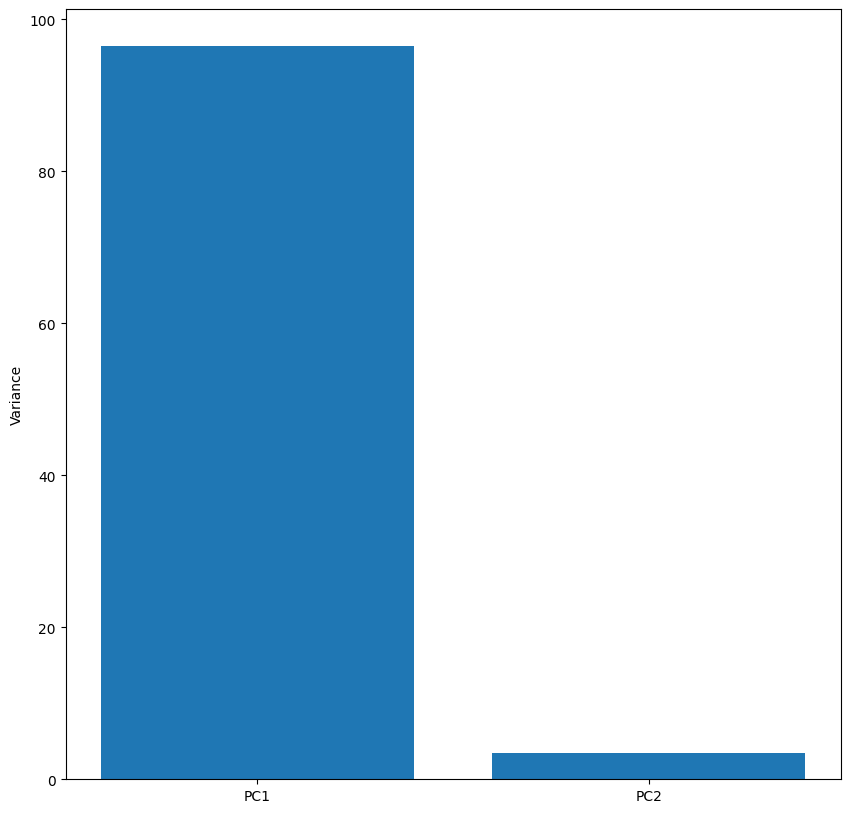

In [21]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

#### Training the models with 6 clusters



In [22]:
model = KMeans(n_clusters = 6, init = 'k-means++')
label = model.fit_predict(data)
print(label)

D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 5]


In [23]:
kmeans_df['clusters'] = model.fit_predict(data)

D:\DataAlalytics\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
kmeans_df.head(10)

median_listing_price  active_listing_count  median_days_on_market  \
0                74000.0                   2.0                   59.0   
1                28250.0                   8.0                   53.0   
2               187000.0                   4.0                   81.0   
3                84875.0                   1.0                   76.0   
5               293750.0                   2.0                   25.0   
6               419900.0                   1.0                   38.0   
7               331075.0                  11.0                   26.0   
8               170000.0                   1.0                    8.0   
9               918725.0                   6.0                   62.0   
10              416000.0                  41.0                   59.0   

    new_listing_count  price_increased_count  price_reduced_count  \
0                 0.0                    0.0                  0.0   
1                 2.0                    0.0                  0.0   
2                 0.0                    0.0                  0.0   
3                 0.0                    0.0                  2.0   
5                 2.0                    0.0                  0.0   
6                 0.0                    0.0                  0.0   
7                12.0                    0.0                  8.0   
8                 4.0                    0.0                  0.0   
9                 4.0                    0.0                  0.0   
10               20.0                    0.0                  4.0   

    pending_listing_count  median_listing_price_per_square_foot  \
0                19.93114                                  96.0   
1                19.93114                                  29.0   
2                 3.00000                                 178.0   
3                 1.00000                                  91.0   
5                19.93114                                 205.0   
6                 1.00000                                 129.0   
7                 2.00000                                 251.0   
8                19.93114                                 115.0   
9                 5.00000                                 599.0   
10               27.00000                                 190.0   

    median_square_feet  average_listing_price  total_listing_count  clusters  
0                824.0                74000.0                  2.0         0  
1                947.0               130056.0                  8.0         0  
2                907.0               207661.0                  7.0         0  
3                903.0                84875.0                  1.0         0  
5               1532.0               306250.0                  2.0         4  
6               3300.0               419900.0                  2.0         3  
7               1396.0               447988.0                 13.0         3  
8               1484.0               170000.0                  1.0         0  
9               1570.0              1147768.0                 11.0         5  
10              2070.0               504953.0                 67.0         3

In [25]:
kmeans_df['clusters'].value_counts()

clusters
0    946459
4    813447
3    464097
2    210911
5     79046
1     33999
Name: count, dtype: int64

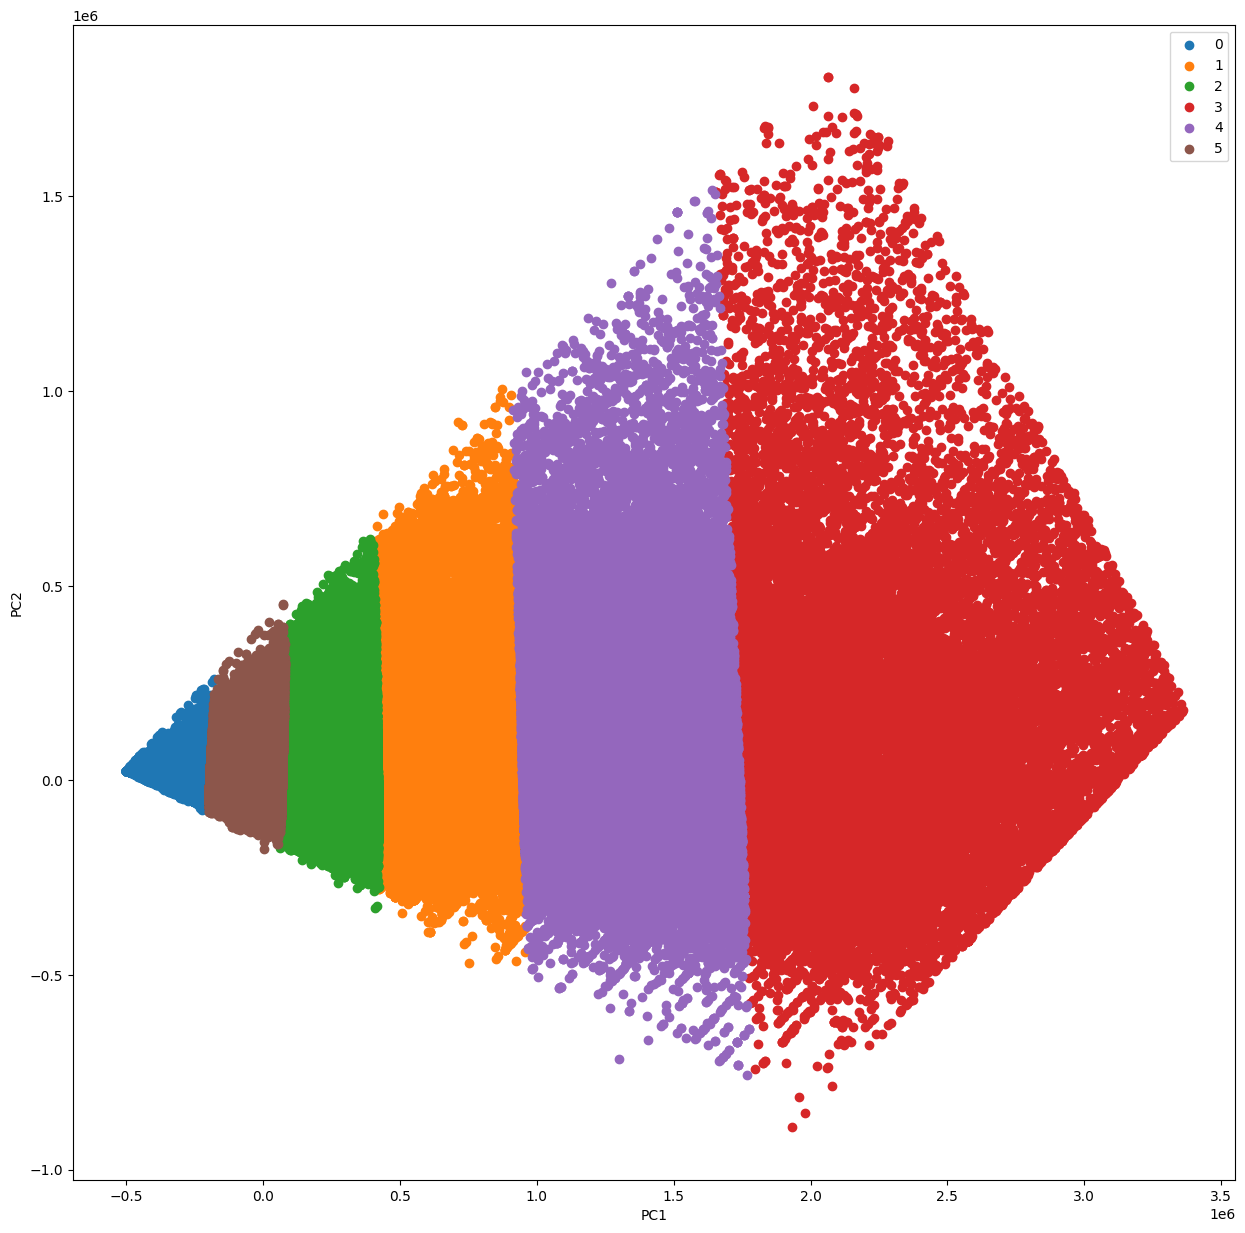

In [26]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Plotting centroids


In [27]:
centers = np.array(model.cluster_centers_)

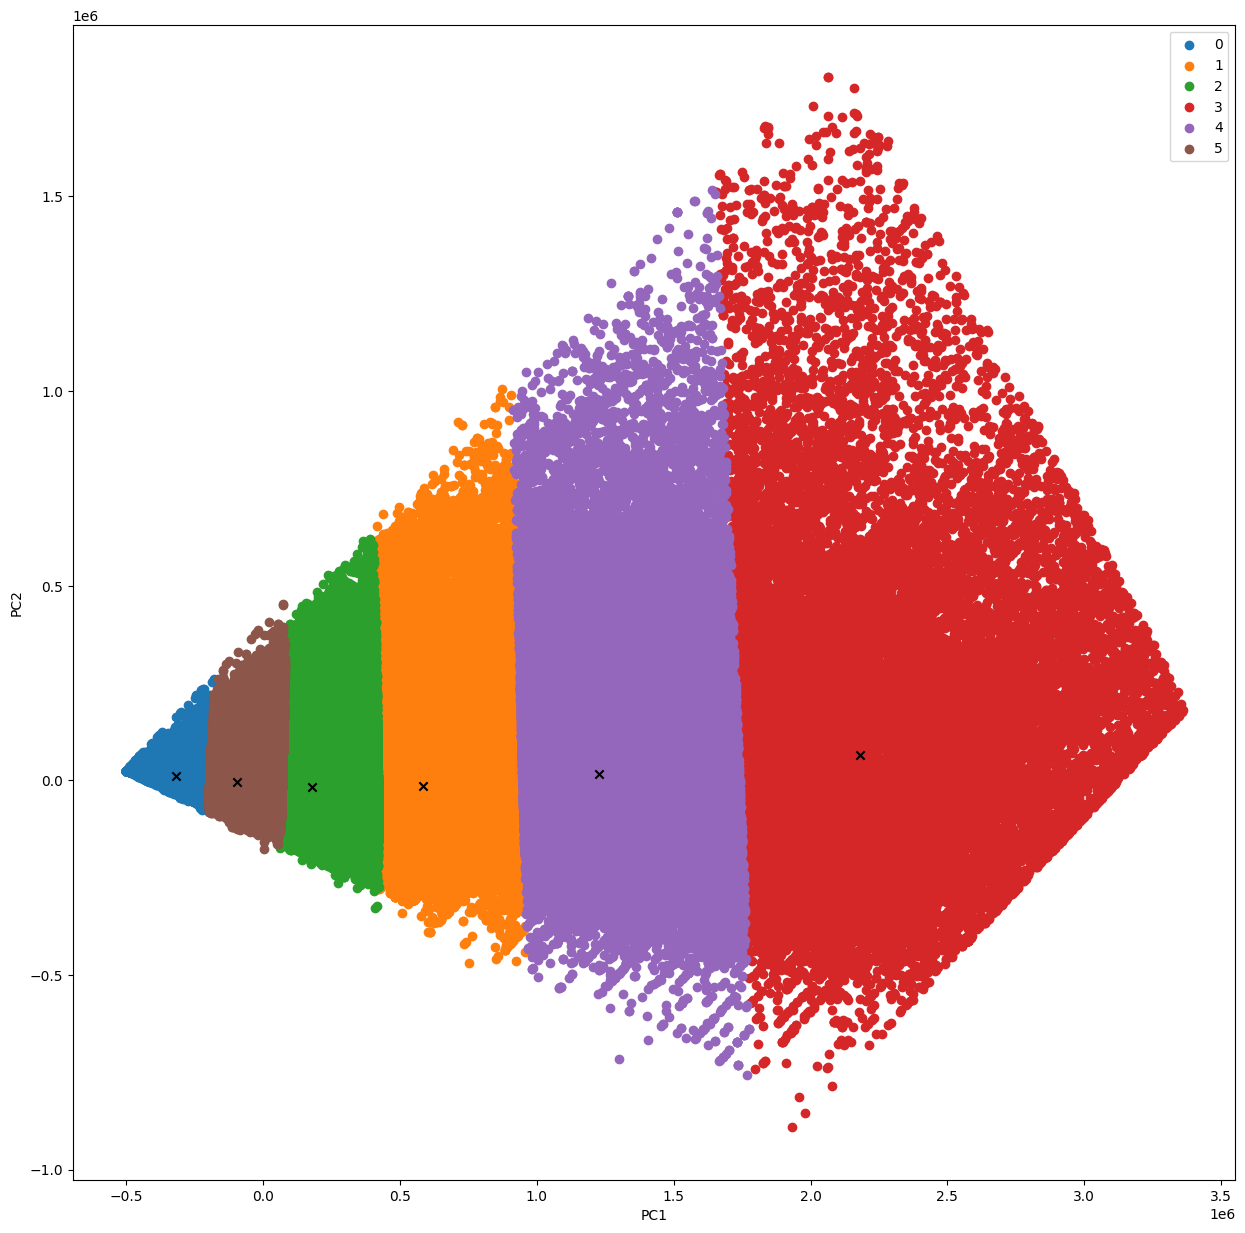

In [29]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)

for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()

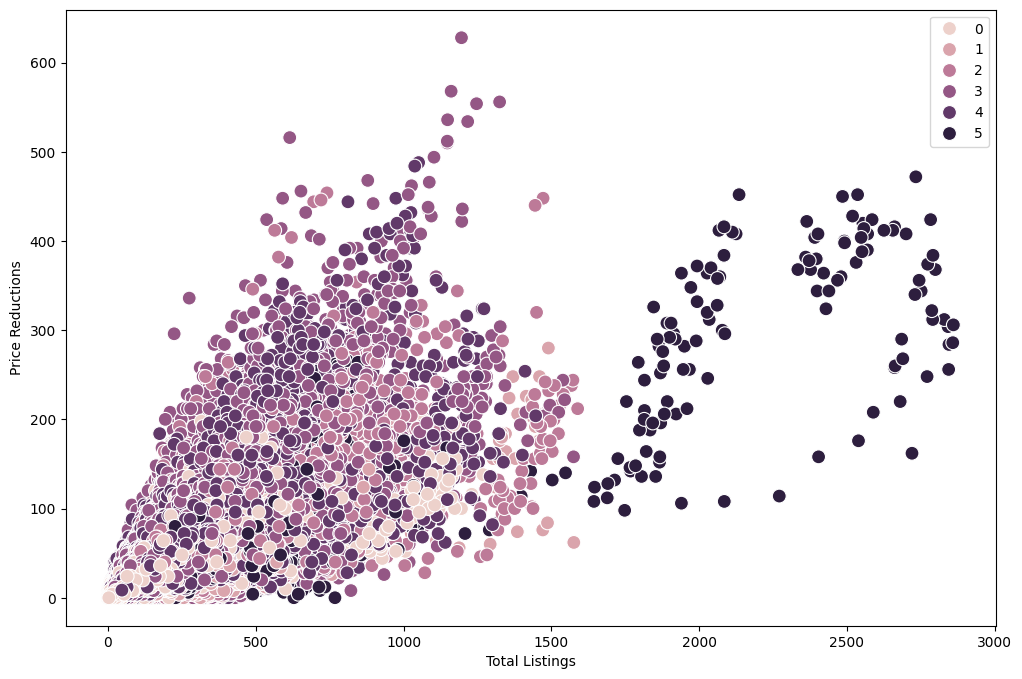

In [30]:
# Plot the clusters for the 'total_listing_count' and 'price_reduced_count' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['total_listing_count'], y=kmeans_df['price_reduced_count'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Listings') # Label x-axis.
plt.ylabel('Price Reductions') # Label y-axis.
plt.show()

### The above scatterplot shows that the highest concentration of total listings is from 0 - 1500 listings, as seen by the light pink (0), medium pink (1), dark pink (2), light purple (3), and medium purple (4) groups. While the darkest purple (5) is mostly concentrated in the 1500 - 3000 listings. We can also see that as the shade of pink and purple gets darker (total listings increase) we can see that the number of properties that experience price reductions also increase. This is especially apparent in the dark pink (2), light purple (3), medium purple (4), and dark purple (5) groups. However, the dark purple (5) group is the only group with over 1500 total listings. 

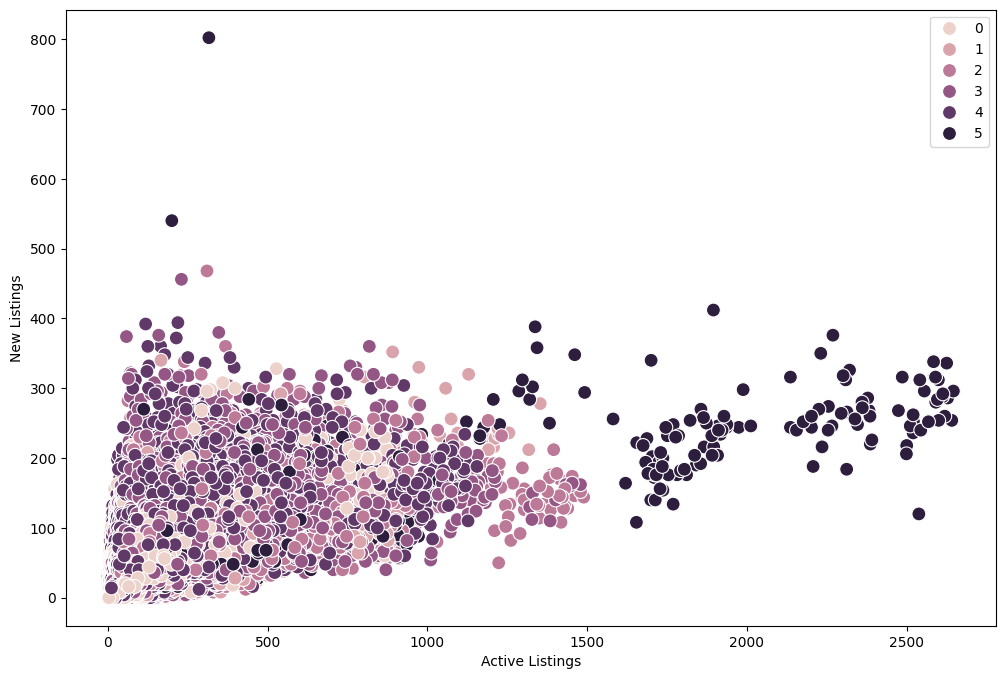

In [31]:
# Plot the clusters for the 'active_listing_count' and 'new_listing_count' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['active_listing_count'], y=kmeans_df['new_listing_count'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Active Listings') # Label x-axis.
plt.ylabel('New Listings') # Label y-axis.
plt.show()

### The above scatterplot shows that the highest concentration of active listings is from 0 - 1500 listings, as seen by the light pink (0), medium pink (1), dark pink (2), light purple (3), and medium purple (4) groups. While the darkest purple (5) is mostly concentrated in the 1500 - 3000 active listings. We can also see that as the shade of pink and purple gets darker (active listings increase) we can see that the number of new listings also increases. This can be seen in all groups, but dark purple (5) is the only group with over 1500 active listings. 

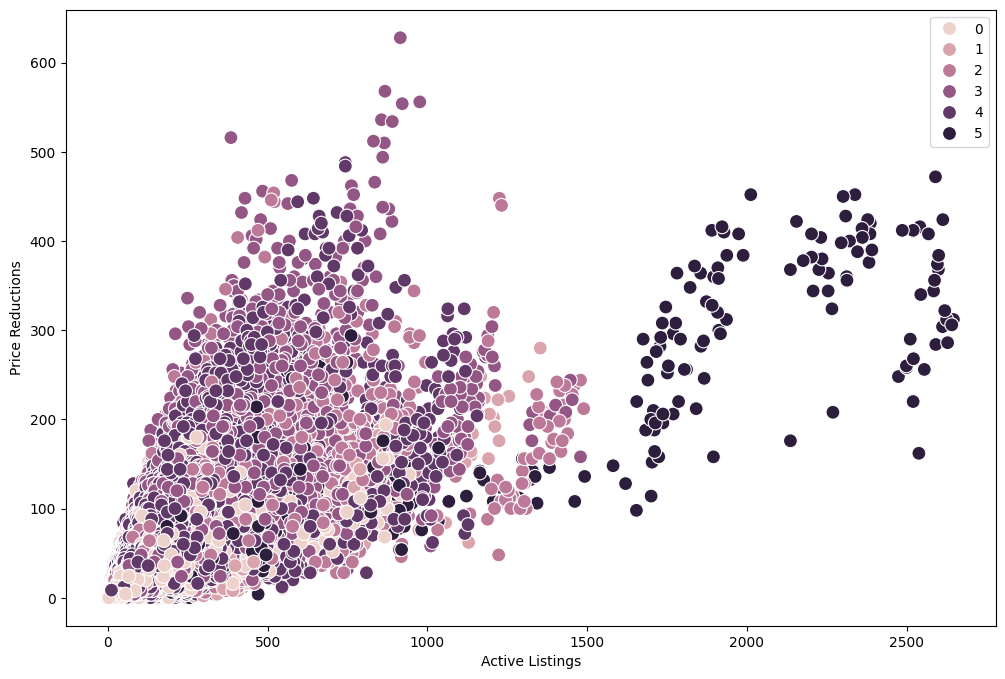

In [32]:
# Plot the clusters for the 'active_listing_count' and 'price_reduced_count' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['active_listing_count'], y=kmeans_df['price_reduced_count'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Active Listings') # Label x-axis.
plt.ylabel('Price Reductions') # Label y-axis.
plt.show()

### The above scatterplot shows that the highest concentration of active listings is from 0 - 1500 active listings, as seen by the light pink (0), medium pink (1), dark pink (2), light purple (3), and medium purple (4) groups. While the darkest purple (5) is mostly concentrated in the 1500 - 3000 active listings. We can also see that as the shade of pink and purple gets darker (active listings increase) we can see that the number of price reductions also increases. This is especially apparent in the dark pink (2), light purple (3), medium purple (4), and dark purple (5) groups. However, the dark purple (5) group is the only group with over 1500 total listings.

D:\DataAlalytics\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


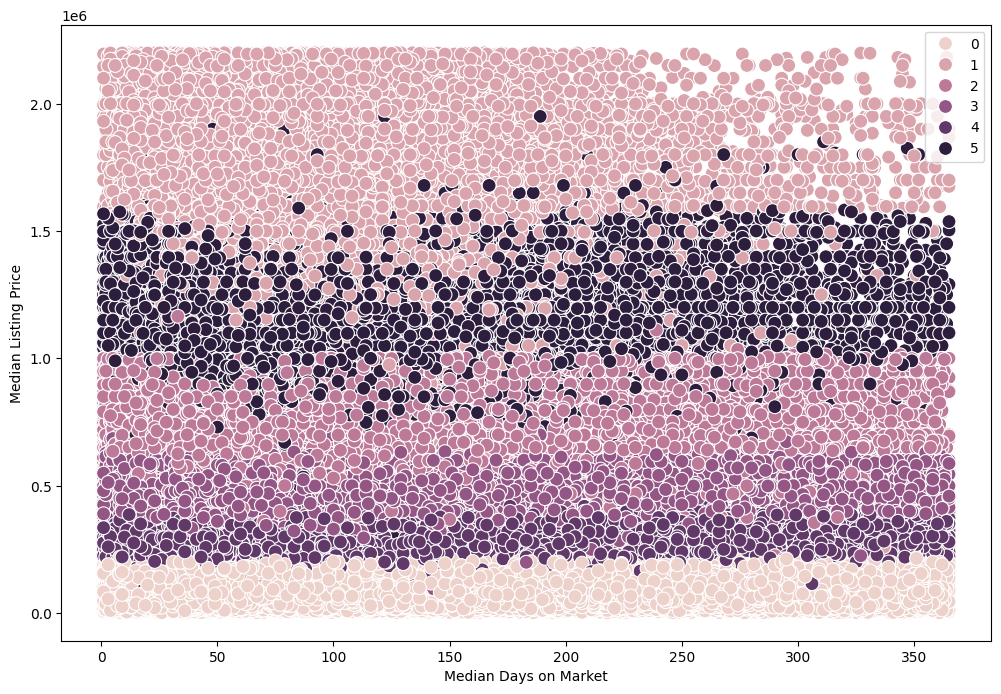

In [33]:
# Plot the clusters for the 'median_days_on_market' and 'median_listing_price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['median_days_on_market'], y=kmeans_df['median_listing_price'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Days on Market') # Label x-axis.
plt.ylabel('Median Listing Price') # Label y-axis.
plt.show()

### The above scatterplot shows that all groups at all listing prices experience median days on market from 0 - over 350 days on market. Therefore, there does not appear to be a relationship between price and days on market. 

D:\DataAlalytics\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


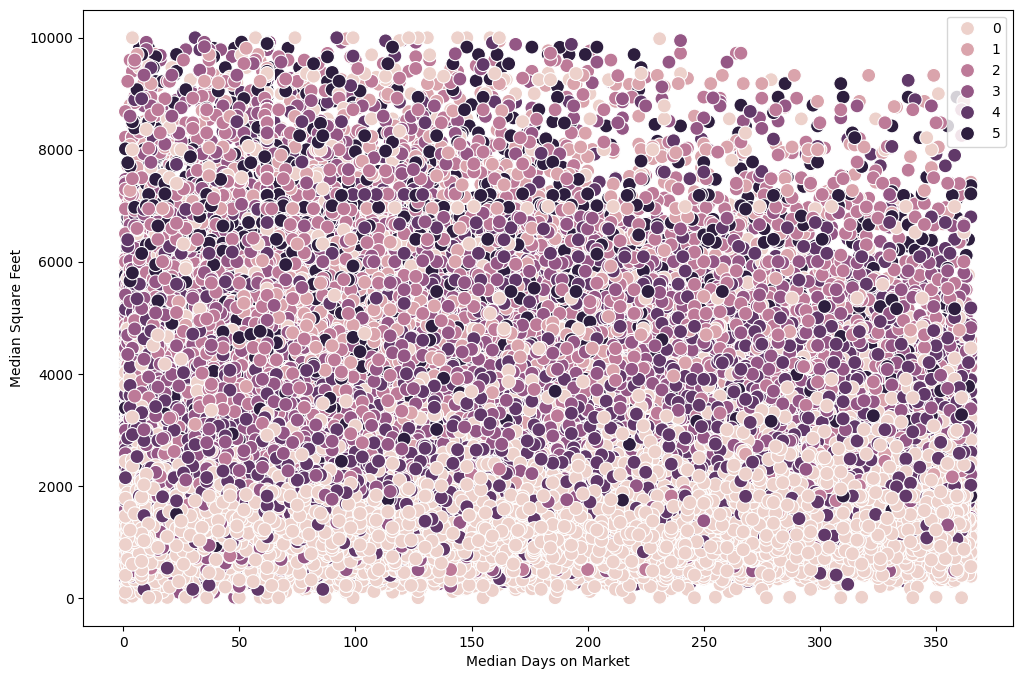

In [34]:
# Plot the clusters for the 'median_days_on_market' and 'median_square_feet' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['median_days_on_market'], y=kmeans_df['median_square_feet'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Days on Market') # Label x-axis.
plt.ylabel('Median Square Feet') # Label y-axis.
plt.show()

### The above scatterplot shows that all groups at all sizes (median square feet) experience median days on market from 0 - over 350 days on market. Therefore, there does not appear to be a relationship between price and days on market. 

D:\DataAlalytics\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


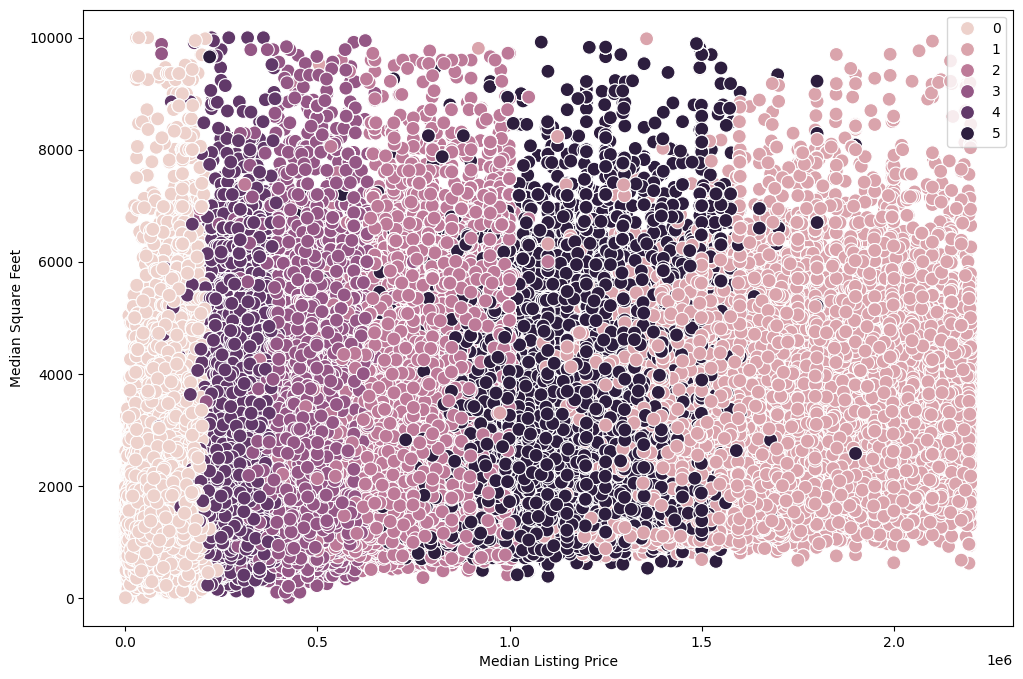

In [35]:
# Plot the clusters for the 'median_listing_price' and 'median_square_feet' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kmeans_df['median_listing_price'], y=kmeans_df['median_square_feet'], hue=model.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Listing Price') # Label x-axis.
plt.ylabel('Median Square Feet') # Label y-axis.
plt.show()

### The above scatterplot shows that all groups at all sizes (median square feet) experience different list prices. Light pink (0) experiences the lowest liting prices followed by medium purple (4), then light purple (3), then by dark pink (2), dark purple (5), then last is medium pink (1) with the largest (most spread out) group and mostly encompases properties that are listed at 1.5 million and above.

In [36]:
kmeans_df.loc[kmeans_df['clusters'] == 5, 'cluster'] = 'dark purple'
kmeans_df.loc[kmeans_df['clusters'] == 4, 'cluster'] = 'medium purple'
kmeans_df.loc[kmeans_df['clusters'] == 3, 'cluster'] = 'light purple'
kmeans_df.loc[kmeans_df['clusters'] == 2, 'cluster'] = 'dark pink'
kmeans_df.loc[kmeans_df['clusters'] == 1, 'cluster'] = 'medium pink'
kmeans_df.loc[kmeans_df['clusters'] == 0, 'cluster'] = 'light pink'

In [37]:
kmeans_df.columns

Index(['median_listing_price', 'active_listing_count', 'median_days_on_market',
       'new_listing_count', 'price_increased_count', 'price_reduced_count',
       'pending_listing_count', 'median_listing_price_per_square_foot',
       'median_square_feet', 'average_listing_price', 'total_listing_count',
       'clusters', 'cluster'],
      dtype='object')

In [39]:
pd.options.display.max_columns=None

In [40]:
kmeans_df.groupby('cluster').agg({'median_listing_price':['mean', 'median'], 
                         'active_listing_count':['mean', 'median'], 
                         'median_days_on_market':['mean', 'median'],
                          'new_listing_count':['mean', 'median'],
                                 'price_increased_count':['mean', 'median'], 
                         'price_reduced_count':['mean', 'median'], 
                         'pending_listing_count':['mean', 'median'],
                          'median_listing_price_per_square_foot':['mean', 'median'],
                                 'median_square_feet':['mean', 'median'], 
                         'average_listing_price':['mean', 'median'], 
                         'total_listing_count':['mean', 'median']})

median_listing_price            active_listing_count         \
                              mean     median                 mean median   
cluster                                                                     
dark pink             6.856755e+05   680000.0            43.529143   19.0   
dark purple           1.045561e+06  1047000.0            46.429965   19.0   
light pink            1.222655e+05   125000.0            18.554009    5.0   
light purple          4.444620e+05   437400.0            42.918256   20.0   
medium pink           1.579923e+06  1615000.0            51.174005   23.0   
medium purple         2.696154e+05   265000.0            35.967026   14.0   

              median_days_on_market        new_listing_count         \
                               mean median              mean median   
cluster                                                               
dark pink                 67.904007   55.0         20.329276   10.0   
dark purple               71.236546   58.0         18.735142    8.0   
light pink                84.540597   72.0          6.568728    0.0   
light purple              65.426447   54.0         21.516605   10.0   
medium pink               74.370364   62.0         19.107444   10.0   
medium purple             70.031824   59.0         16.847522    6.0   

              price_increased_count        price_reduced_count         \
                               mean median                mean median   
cluster                                                                 
dark pink                  1.133635    0.0           11.752256    4.0   
dark purple                0.960479    0.0           10.438302    4.0   
light pink                 0.231672    0.0            4.027232    0.0   
light purple               1.518402    0.0           12.957214    4.0   
medium pink                0.839319    0.0            9.617871    4.0   
medium purple              1.177069    0.0           10.195042    4.0   

              pending_listing_count         \
                               mean median   
cluster                                      
dark pink                 24.861865   17.0   
dark purple               22.678965   16.0   
light pink                13.131614    8.0   
light purple              27.101581   17.0   
medium pink               23.790630   17.0   
medium purple             22.058613   13.0   

              median_listing_price_per_square_foot        median_square_feet  \
                                              mean median               mean   
cluster                                                                        
dark pink                               324.173675  291.0        2417.165980   
dark purple                             466.706576  415.0        2627.588328   
light pink                               83.123979   79.0        1600.102959   
light purple                            219.868097  204.0        2204.513946   
medium pink                             656.147681  592.0        2872.602635   
medium purple                           146.790693  138.0        1940.891992   

                      average_listing_price            total_listing_count  \
               median                  mean     median                mean   
cluster                                                                      
dark pink      2288.0          8.462917e+05   822000.0           65.363035   
dark purple    2419.0          1.378914e+06  1343597.5           66.083078   
light pink     1558.0          1.393593e+05   142900.0           24.892107   
light purple   2116.0          5.224197e+05   509667.0           67.019056   
medium pink    2571.0          2.167994e+06  2088723.0           71.799906   
medium purple  1872.0          3.103562e+05   304004.0           54.291080   

                      
              median  
cluster               
dark pink       32.0  
dark purple     31.0  
light pink       7.0  
light purple    32.0  
medium pink     36.0  

In [41]:
pd.reset_option('display.max_columns')

### Medium pink has the most columns with the highest values while light pink has the most columns with the lowest values. Medium purple has the most columns with the second lowest values. Light purple has a mixture of values ranging from least to greatest, with 4 values being in middle and 4 values being the greatest. Dark purple has the most columns in the medium high range and dark purple has several columns in the medium low range and medium high range. 
### From the medium pink group, I can see that the greatest median list price has the most active listings, the highest median listing price per square foot, the highest median square foot size, the highest average list price, and the greatest total listings. 
### From the light pink group, I can see that this group has the lowest median list price, the least amount of active listings, the highest days on market (perhaps due to condition of the home - may need a lot of repairs), the least amount of new listings, least amount of price increases, least amount of price decreases, least amount of pending listings, least price per square feet, lease square feet, least average listing price, and least total listings. This could be that this group encludes forclosures and dilapidated properties.
### From the medium purple group, I can see that this group has the second to lowest median list price, active listings, new listings, pending listings, listing price per square foot, median square foot, average list price, and total listings. However, this group has the 4th highest median days on market, fifth highest price increases, and 3rd highest price reductions. 